# Logistic Regression and Gradient descent

## Loading data

Loading the Iris dataset from scikit-learn. 

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()

Features:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Target:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

In [4]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

This demo uses the third and four feature which are petal length and petal width.  Let's focus only on the first 2 classes for this demo.

In [6]:
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

X = X[y != 2,:]
y = y[y != 2]

print('Focus class labels:', np.unique(y))

Class labels: [0 1 2]
Focus class labels: [0 1]


Splitting data into 80% training and 20% test data:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

Standardizing the features:

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training a logistic regression model with scikit-learn

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(random_state=0)

In [10]:
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
lr.predict_proba(X_test_std)

array([[0.94291975, 0.05708025],
       [0.00478457, 0.99521543],
       [0.98038046, 0.01961954],
       [0.01246437, 0.98753563],
       [0.0102354 , 0.9897646 ],
       [0.16117745, 0.83882255],
       [0.9619304 , 0.0380696 ],
       [0.01319376, 0.98680624],
       [0.00550875, 0.99449125],
       [0.02643203, 0.97356797],
       [0.02498932, 0.97501068],
       [0.03478866, 0.96521134],
       [0.00634182, 0.99365818],
       [0.98939422, 0.01060578],
       [0.97412038, 0.02587962],
       [0.97029865, 0.02970135],
       [0.98708565, 0.01291435],
       [0.9552725 , 0.0447275 ],
       [0.97746178, 0.02253822],
       [0.97746178, 0.02253822]])

predict() and predict_proba() method take a 2d array of values.

In [12]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([0])

In [13]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[0.94291975, 0.05708025]])

In [14]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, lr.predict(X_test_std)))

Accuracy: 1.00


### Decision boundary visualization

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-15-82c238ea8fbb>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


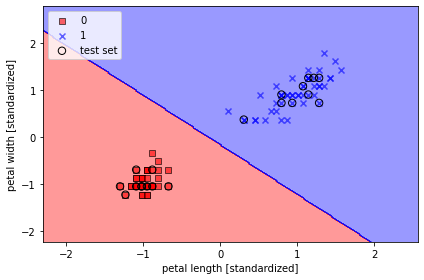

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

### Regularization

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [17]:
weights, params, acc = [], [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    print(lr.coef_)
    weights.append(lr.coef_[0])
    params.append(10**c)
    acc.append(accuracy_score(y_test, lr.predict(X_test_std)))

[[0.00038754 0.00038279]]
[[0.00386169 0.00381427]]
[[0.03730215 0.03682814]]
[[0.28073938 0.27607683]]
[[0.99291744 0.96072704]]
[[2.02988675 1.92308838]]
[[3.34691606 3.11991449]]
[[4.95090236 4.53657699]]
[[6.78512491 6.17717459]]
[[8.74451508 7.92236016]]


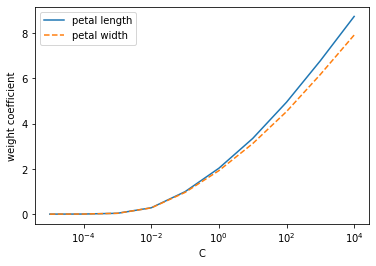

In [18]:
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

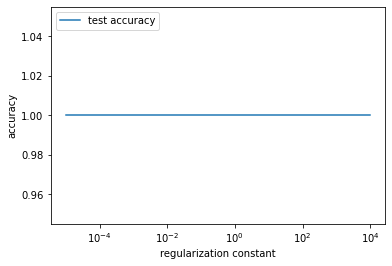

In [19]:
plt.plot(params, acc, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('regularization constant')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

Prediction has been affected

In [20]:
lr.predict_proba(X_test_std)

array([[9.99975211e-01, 2.47893832e-05],
       [4.78017625e-11, 1.00000000e+00],
       [9.99999761e-01, 2.39420694e-07],
       [2.68852784e-09, 9.99999997e-01],
       [1.21497945e-09, 9.99999999e-01],
       [2.75360867e-04, 9.99724639e-01],
       [9.99996027e-01, 3.97320218e-06],
       [3.23158389e-09, 9.99999997e-01],
       [8.80013840e-11, 1.00000000e+00],
       [6.83343240e-08, 9.99999932e-01],
       [5.68509863e-08, 9.99999943e-01],
       [2.31594493e-07, 9.99999768e-01],
       [1.62007074e-10, 1.00000000e+00],
       [9.99999983e-01, 1.73413172e-08],
       [9.99999189e-01, 8.11429578e-07],
       [9.99998506e-01, 1.49380957e-06],
       [9.99999962e-01, 3.83731698e-08],
       [9.99990680e-01, 9.32021508e-06],
       [9.99999559e-01, 4.40764183e-07],
       [9.99999559e-01, 4.40764183e-07]])

In [21]:
lr_l = LogisticRegression(C=10.**-5, random_state=0)
lr_l.fit(X_train_std, y_train)
lr_l.predict_proba(X_test_std)

array([[0.50015162, 0.49984838],
       [0.49975538, 0.50024462],
       [0.50020584, 0.49979416],
       [0.49980283, 0.50019717],
       [0.49979263, 0.50020737],
       [0.49993487, 0.50006513],
       [0.5001719 , 0.4998281 ],
       [0.49980628, 0.50019372],
       [0.49976214, 0.50023786],
       [0.49984009, 0.50015991],
       [0.49983664, 0.50016336],
       [0.49985361, 0.50014639],
       [0.4997689 , 0.5002311 ],
       [0.50023633, 0.49976367],
       [0.50019231, 0.49980769],
       [0.50018555, 0.49981445],
       [0.50022612, 0.49977388],
       [0.50016527, 0.49983473],
       [0.50019907, 0.49980093],
       [0.50019907, 0.49980093]])

<br>

## Gradient Decent for Logistic Regression

alpha : Constant that multiplies the regularization term

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Accuracy: 1.00


<ipython-input-15-82c238ea8fbb>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


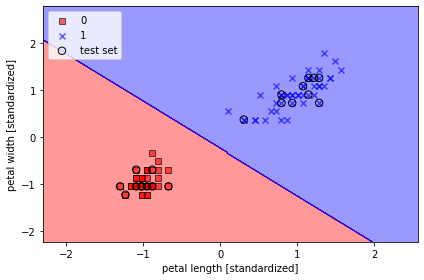

In [22]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log", alpha = 0.001)
clf.fit(X_train_std, y_train)

print('Accuracy: %.2f' % accuracy_score(y_test, clf.predict(X_test_std)))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=clf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Accuracy: 0.65


<ipython-input-15-82c238ea8fbb>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


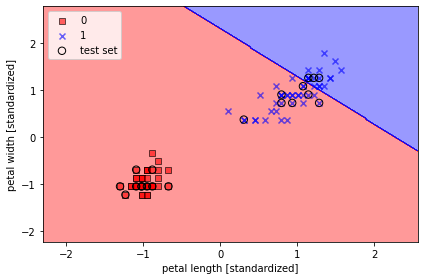

In [23]:
clf = SGDClassifier(loss="log", alpha = 5)
clf.fit(X_train_std, y_train)

print('Accuracy: %.2f' % accuracy_score(y_test, clf.predict(X_test_std)))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=clf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()